# SVM CLASSIFIER

# 1. Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then 1. Measure the accuracy of your model using different kernels such as RBF,poly, and linear.2. Use 80% of samples as training data size

In [1]:
import sklearn

In [2]:
from sklearn.datasets import load_digits
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
digits=load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
df.shape

(1797, 64)

In [9]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

In [10]:
df['target']=digits.target

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [15]:
digits.data.shape
digits.target.shape

(1797,)

In [19]:
df.target
df.values

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  9.,  0.,  2.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0.,  8.],
       [ 0.,  0.,  2., ...,  0.,  0.,  9.],
       [ 0.,  0., 10., ...,  1.,  0.,  8.]])

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
x=df.drop(['target'],axis='columns')
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [27]:
len(x_train)
len(x_test)

360

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [29]:
model1=SVC(kernel='rbf',random_state=0,probability=True)
model1.fit(x_train,y_train)
y_pred_1=model1.predict(x_test)

In [30]:
print("Model score of kernel(rbf) :",model1.score(x_test,y_test))

Model score of kernel(rbf) : 0.9916666666666667


In [31]:
model2=SVC(kernel='linear',random_state=0,probability=True)
model2.fit(x_train,y_train)
y_pred_2=model2.predict(x_test)

In [32]:
print("Model score of kernel(Linear) :",model2.score(x_test,y_test))

Model score of kernel(Linear) : 0.975


In [33]:
model3=SVC(kernel='poly',random_state=0,probability=True)
model3.fit(x_train,y_train)
y_pred_3=model3.predict(x_test)

In [34]:
print("Model score of kernel(poly) :",model3.score(x_test,y_test))

Model score of kernel(poly) : 0.9944444444444445


In [35]:
accuracy=accuracy_score(y_test,y_pred_3)
print('Accuracy is',accuracy)

Accuracy is 0.9944444444444445


In [100]:
from sklearn.metrics import confusion_matrix
cm=np.array(confusion_matrix(y_test,y_pred_3))
cm

ValueError: Found input variables with inconsistent numbers of samples: [300, 360]

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_3)
mse

In [40]:
model1_C=SVC(C=3)
model1_C.fit(x_train,y_train)
model1_C.score(x_test,y_test)

0.9944444444444445

In [41]:
model2_C=SVC(C=3)
model2_C.fit(x_train,y_train)
model2_C.score(x_test,y_test)

0.9944444444444445

In [42]:
model3_C=SVC(C=3)
model3_C.fit(x_train,y_train)
model3_C.score(x_test,y_test)

0.9944444444444445

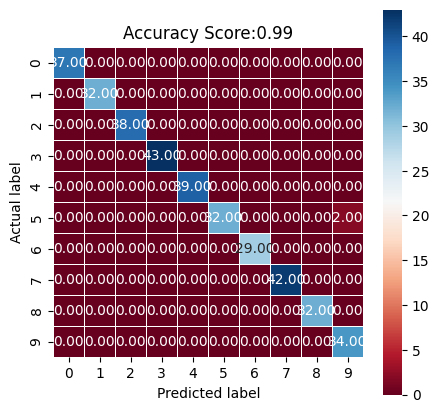

In [50]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt=".2f",linewidth=.7,square=True,cmap='RdBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
A=f'Accuracy Score:{accuracy:.2f}'
plt.title(A)
plt.show()

# MULTI-LAYER PERCEPTRON

# 1. Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then 1. Measure the accuracy of your model using different kernels such as RBF,poly, and linear. 2. Use 80% of samples as training data size

In [52]:
import pandas as pd
import numpy as np

df=pd.read_csv("BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [53]:
df.shape

(1372, 5)

In [54]:
df.describe(include='all')

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [55]:
x=df.drop("class",axis=1)
y=df['class']

In [56]:
print(x.head(2))
print(y.head(2))

   variance  skewness  curtosis  entropy
0    3.6216    8.6661   -2.8073 -0.44699
1    4.5459    8.1674   -2.4586 -1.46210
0    0
1    0
Name: class, dtype: int64


In [57]:
# splitting to training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(x_train.shape)
print(y_test.shape)

(960, 4)
(412,)


In [58]:
# Normalized input x train
from sklearn.neural_network import MLPClassifier


In [60]:
mlp=MLPClassifier(max_iter=500,activation='relu')
mlp

MLPClassifier(max_iter=500)

In [61]:
mlp.fit(x_train,y_train)


MLPClassifier(max_iter=500)

In [62]:
pred=mlp.predict(x_test)
pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

# Evaluation metrics -Confusion metrics and F2 score

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,pred)

array([[232,   0],
       [  0, 180]], dtype=int64)

In [64]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       180

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



# K Nearest Neighbors

# 3. Implement the K Nearest Neighbors algorithm and test the algorithm using any data set of your choice. The output should include Accuracy, Error rate, Precision, and recall rate along with the confusion matrix

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [67]:
df=pd.read_csv("Classified Data",index_col=0)

In [68]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler=StandardScaler()

In [72]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [73]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [75]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn=KNeighborsClassifier(n_neighbors=1)

In [82]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [83]:
pred=knn.predict(x_test)

In [84]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [86]:
print(confusion_matrix(y_test,pred))

[[134  18]
 [ 14 134]]


In [87]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       152
           1       0.88      0.91      0.89       148

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [89]:
accuracy_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())

In [90]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    error_rate.append(1-score.mean())

In [92]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

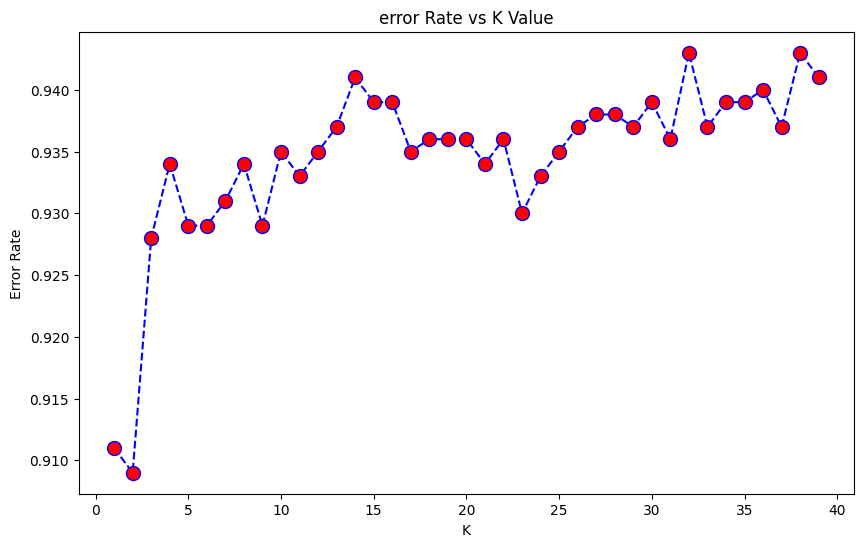

In [94]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [96]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[134  18]
 [ 14 134]]


              precision    recall  f1-score   support

           0       0.91      0.88      0.89       152
           1       0.88      0.91      0.89       148

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [97]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[138  14]
 [  6 142]]


              precision    recall  f1-score   support

           0       0.96      0.91      0.93       152
           1       0.91      0.96      0.93       148

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

